In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.columns

Index(['SystemCodeNumber', 'Capacity', 'Occupancy', 'LastUpdated'], dtype='object')

In [4]:
print(data.head)

<bound method NDFrame.head of       SystemCodeNumber  Capacity  Occupancy          LastUpdated
0          BHMBCCMKT01       577         61  2016-10-04 07:59:42
1          BHMBCCMKT01       577         64  2016-10-04 08:25:42
2          BHMBCCMKT01       577         80  2016-10-04 08:59:42
3          BHMBCCMKT01       577        107  2016-10-04 09:32:46
4          BHMBCCMKT01       577        150  2016-10-04 09:59:48
...                ...       ...        ...                  ...
35712         Shopping      1920       1517  2016-12-19 14:30:33
35713         Shopping      1920       1487  2016-12-19 15:03:34
35714         Shopping      1920       1432  2016-12-19 15:29:33
35715         Shopping      1920       1321  2016-12-19 16:03:35
35716         Shopping      1920       1180  2016-12-19 16:30:35

[35717 rows x 4 columns]>


In [5]:
data_arr=data.values[:,:3]

In [6]:
data_arr.shape

(35717, 3)

In [7]:
np.unique(data_arr[:,0])

array(['BHMBCCMKT01', 'BHMBCCPST01', 'BHMBCCSNH01', 'BHMBCCTHL01',
       'BHMBRCBRG01', 'BHMBRCBRG02', 'BHMBRCBRG03', 'BHMBRTARC01',
       'BHMEURBRD01', 'BHMEURBRD02', 'BHMMBMMBX01', 'BHMNCPHST01',
       'BHMNCPLDH01', 'BHMNCPNHS01', 'BHMNCPNST01', 'BHMNCPPLS01',
       'BHMNCPRAN01', 'Broad Street', 'Bull Ring', 'NIA Car Parks',
       'NIA North', 'NIA South', 'Others-CCCPS105a', 'Others-CCCPS119a',
       'Others-CCCPS133', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [8]:
data_arr

array([['BHMBCCMKT01', 577, 61],
       ['BHMBCCMKT01', 577, 64],
       ['BHMBCCMKT01', 577, 80],
       ...,
       ['Shopping', 1920, 1432],
       ['Shopping', 1920, 1321],
       ['Shopping', 1920, 1180]], dtype=object)

In [9]:
le=LabelEncoder()

In [10]:
data_arr[:,0]=le.fit_transform(data_arr[:,0])

In [11]:
len(le.classes_)

30

#### Classification

In [12]:
data_arr

array([[0, 577, 61],
       [0, 577, 64],
       [0, 577, 80],
       ...,
       [29, 1920, 1432],
       [29, 1920, 1321],
       [29, 1920, 1180]], dtype=object)

In [13]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

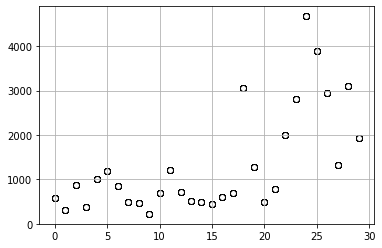

In [15]:
plt.scatter(data_arr[:,0],data_arr[:,1],c='white',edgecolor='black',marker='o')
plt.grid()
plt.show()

In [16]:
km=KMeans(n_clusters=5,init='random',n_init=10,max_iter=300,random_state=0)

In [17]:
x_pred=km.fit_predict(data_arr)

In [18]:
center=km.cluster_centers_

In [19]:
center

array([[  11.95213933, 1152.01165661,  552.60628086],
       [  10.17324271,  554.89119142,  279.8938992 ],
       [  23.74423759, 4159.92375887, 2607.10106383],
       [  24.2436038 , 3103.44152047,  926.65259503],
       [  25.46520569, 1963.74394464, 1111.75009612]])

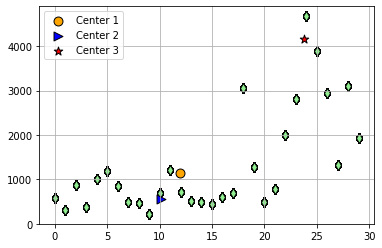

In [39]:
plt.figure()
plt.scatter(data_arr[:,0],data_arr[:,1],s=50,c='lightgreen',marker='d',edgecolor='black')
plt.scatter(center[0,0],center[0,1],s=80,c='orange',marker='o',edgecolor='black',label='Center 1')
plt.scatter(center[1,0],center[1,1],s=80,c='blue',marker='>',edgecolor='black',label='Center 2')
plt.scatter(center[2,0],center[2,1],s=80,c='red',marker='*',edgecolor='black',label='Center 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [40]:
print("Distortion={}".format(km.inertia_))

Distortion=5668407062.031101


In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
ac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [ ]:
x_pred=ac.fit_predict(data_arr)

In [ ]:
x_pred